In [1]:
import pandas as pd
import numpy as np

In [2]:
#loading train dataset
train_df = pd.read_csv(r'bank-2/train.csv', names = ['age', 'job', 'marital', 'education',
                                                                            'default', 'balance', 'housing', 'loan', 'contact', 
                                                                            'day', 'month', 'duration', 'campaign', 'pdays',
                                                                            'previous', 'poutcome', 'y'])
#train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,41,services,married,secondary,no,0,yes,no,unknown,5,may,114,2,-1,0,unknown,no
1,48,blue-collar,single,secondary,no,312,yes,yes,cellular,3,feb,369,2,-1,0,unknown,no
2,55,technician,married,secondary,no,1938,no,yes,cellular,18,aug,193,1,386,3,success,yes
3,54,admin.,married,tertiary,no,59,yes,no,cellular,10,jul,268,1,-1,0,unknown,no
4,34,management,single,tertiary,no,2646,no,no,cellular,14,apr,142,1,-1,0,unknown,yes


In [3]:
#to find the median of the attribute/column
def threshold(df, col):
    l = len(df.iloc[:,col])
    if l%2 == 0:
        median = (train_df.iloc[l//2,col] + train_df.iloc[l//2-1,col])/2 
    else:
        median = train_df.iloc[l//2,0]
    return median

In [4]:
#column with numerical values: age, balance, day, duration, campaign, pdays, previous
#corresponding column numbers: 0, 5, 9, 11, 12, 13, 14
age_threshold = threshold(train_df, 0)
balance_threshold = threshold(train_df, 5)
day_threshold = threshold(train_df, 9)
duration_threshold = threshold(train_df, 11)
campaign_threshold = threshold(train_df, 12)
pdays_threshold = threshold(train_df, 13)
previous_threshold = threshold(train_df, 14)

In [5]:
#converting numerical values into binary categories
#if value>threshold, then 1, else 0
def convert(df, col, threshold):
    for i in range(len(df.iloc[:,col])):
        if df.iloc[i,col]>threshold:
            df.iloc[i,col] = 1
        else:
            df.iloc[i,col] = 0


In [6]:
#converting train dataset
convert(train_df, 0, age_threshold)
convert(train_df, 5, balance_threshold)
convert(train_df, 9, day_threshold)
convert(train_df, 11, duration_threshold)
convert(train_df, 12, campaign_threshold)
convert(train_df, 13, pdays_threshold)
convert(train_df, 14, previous_threshold)


In [7]:
print("Converting numerical values in TRAIN DATA into binary categories")
#train_df.head()

Converting numerical values in TRAIN DATA into binary categories


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,services,married,secondary,no,0,yes,no,unknown,0,may,0,0,0,0,unknown,no
1,1,blue-collar,single,secondary,no,0,yes,yes,cellular,0,feb,1,0,0,0,unknown,no
2,1,technician,married,secondary,no,1,no,yes,cellular,0,aug,1,0,1,1,success,yes
3,1,admin.,married,tertiary,no,0,yes,no,cellular,0,jul,1,0,0,0,unknown,no
4,0,management,single,tertiary,no,1,no,no,cellular,0,apr,0,0,0,0,unknown,yes


In [8]:
#loading test datset
test_df = pd.read_csv(r'bank-2/test.csv', names = ['age', 'job', 'marital', 'education',
                                                                            'default', 'balance', 'housing', 'loan', 'contact', 
                                                                            'day', 'month', 'duration', 'campaign', 'pdays',
                                                                            'previous', 'poutcome', 'y'])
#test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,41,management,single,secondary,no,764,no,no,cellular,12,jun,230,2,-1,0,unknown,no
1,39,blue-collar,married,secondary,no,49,yes,no,cellular,14,may,566,1,370,2,failure,no
2,60,retired,married,primary,no,0,no,no,telephone,30,jul,130,3,-1,0,unknown,no
3,31,entrepreneur,single,tertiary,no,247,yes,yes,unknown,2,jun,273,1,-1,0,unknown,no
4,26,student,single,unknown,no,2020,no,no,telephone,28,jan,42,3,-1,0,unknown,no


In [9]:
#converting test dataset
convert(test_df, 0, age_threshold)
convert(test_df, 5, balance_threshold)
convert(test_df, 9, day_threshold)
convert(test_df, 11, duration_threshold)
convert(test_df, 12, campaign_threshold)
convert(test_df, 13, pdays_threshold)
convert(test_df, 14, previous_threshold)

In [10]:
print("Converting numerical values in TEST DATA into binary categories")
#test_df.head()

Converting numerical values in TEST DATA into binary categories


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,management,single,secondary,no,1,no,no,cellular,0,jun,1,0,0,0,unknown,no
1,1,blue-collar,married,secondary,no,0,yes,no,cellular,0,may,1,0,1,1,failure,no
2,1,retired,married,primary,no,0,no,no,telephone,1,jul,0,1,0,0,unknown,no
3,0,entrepreneur,single,tertiary,no,0,yes,yes,unknown,0,jun,1,0,0,0,unknown,no
4,0,student,single,unknown,no,1,no,no,telephone,1,jan,0,1,0,0,unknown,no


In [11]:
#converting the categorical string type target value into numerical type target value
train_df["y"] = train_df["y"].replace(to_replace = "yes", value = 1)
train_df["y"] = train_df["y"].replace(to_replace = "no", value = -1)
#train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,services,married,secondary,no,0,yes,no,unknown,0,may,0,0,0,0,unknown,-1
1,1,blue-collar,single,secondary,no,0,yes,yes,cellular,0,feb,1,0,0,0,unknown,-1
2,1,technician,married,secondary,no,1,no,yes,cellular,0,aug,1,0,1,1,success,1
3,1,admin.,married,tertiary,no,0,yes,no,cellular,0,jul,1,0,0,0,unknown,-1
4,0,management,single,tertiary,no,1,no,no,cellular,0,apr,0,0,0,0,unknown,1


In [12]:
test_df["y"] = test_df["y"].replace(to_replace = "yes", value = 1)
test_df["y"] = test_df["y"].replace(to_replace = "no", value = -1)
#test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,management,single,secondary,no,1,no,no,cellular,0,jun,1,0,0,0,unknown,-1
1,1,blue-collar,married,secondary,no,0,yes,no,cellular,0,may,1,0,1,1,failure,-1
2,1,retired,married,primary,no,0,no,no,telephone,1,jul,0,1,0,0,unknown,-1
3,0,entrepreneur,single,tertiary,no,0,yes,yes,unknown,0,jun,1,0,0,0,unknown,-1
4,0,student,single,unknown,no,1,no,no,telephone,1,jan,0,1,0,0,unknown,-1


In [13]:
x_train = train_df.iloc[:,:16]
#x_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,services,married,secondary,no,0,yes,no,unknown,0,may,0,0,0,0,unknown
1,1,blue-collar,single,secondary,no,0,yes,yes,cellular,0,feb,1,0,0,0,unknown
2,1,technician,married,secondary,no,1,no,yes,cellular,0,aug,1,0,1,1,success
3,1,admin.,married,tertiary,no,0,yes,no,cellular,0,jul,1,0,0,0,unknown
4,0,management,single,tertiary,no,1,no,no,cellular,0,apr,0,0,0,0,unknown


In [14]:
y_train = train_df["y"]
#y_train

0      -1
1      -1
2       1
3      -1
4       1
       ..
4995   -1
4996    1
4997   -1
4998   -1
4999   -1
Name: y, Length: 5000, dtype: int64

In [15]:
x_test = test_df.iloc[:,:16]
#x_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,management,single,secondary,no,1,no,no,cellular,0,jun,1,0,0,0,unknown
1,1,blue-collar,married,secondary,no,0,yes,no,cellular,0,may,1,0,1,1,failure
2,1,retired,married,primary,no,0,no,no,telephone,1,jul,0,1,0,0,unknown
3,0,entrepreneur,single,tertiary,no,0,yes,yes,unknown,0,jun,1,0,0,0,unknown
4,0,student,single,unknown,no,1,no,no,telephone,1,jan,0,1,0,0,unknown


In [16]:
y_test = test_df["y"]
#y_test.head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: y, dtype: int64

In [32]:
#DECISION TREE IMPLEMENTATION

#finding the unique values an attribute can take
def unique_vals(df, col):
    return set(df.iloc[:,col])

#finding the count of the unique values of the label attribute
def label_counts(df):
    counts = df.iloc[:,16].value_counts()
    return counts.to_dict()

#defining the leaf node by setting it as the max value of all the values the attribute of a feature can take
class Leaf:
    def __init__(self, df):
        self.predictions = self.max_leaf(df)
        
    def max_leaf(self, df):
        res = label_counts(df)
        max_value = max(res, key = res.get)
        return {max_value:res[max_value]}
    
#defining the decision node that splits the node
class Decision_Node:
    def __init__(self, question, true_branch, false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch
        
#finding the weighted entropy of the the attribute
def entropy(df, sample_weights):
    y = df.iloc[:,16]
    entropy = 0
    p_weight = 0
    n_weight = 0
    for i in range(len(df)):
        if y.iloc[i] == 1:
            p_weight = p_weight + sample_weights[i]
        else:
            n_weight = n_weight + sample_weights[i]
    
    np.seterr(all = "ignore")
    entropy = entropy + (((-1)* p_weight * np.log2(p_weight)) + ((-1)* n_weight * np.log2(n_weight)))
    return entropy
        
#finding information gain
def info_gain(model, left, right, current_uncertainty, left_weights, right_weights):
    left_entropy = model(left, left_weights)
    right_entropy = model(right, right_weights)
    total_weight = sum(left_weights) + sum(right_weights)
    return current_uncertainty - ((sum(left_weights)/total_weight) * left_entropy) - ((sum(right_weights)/total_weight) * right_entropy)

#split the dataset by checking each row and appending it to either a true set or false set
def partition(df, question, sample_weights):
    true_rows, false_rows, left_weights, right_weights = [], [], [], []
    for i in range(len(df)):
        row = df.iloc[i, :]
        if question.match(row):
            true_rows.append(row)
            left_weights.append(sample_weights[i])
        else:
            false_rows.append(row)
            right_weights.append(sample_weights[i])
    
    #converting the rows of list type into DataFrame type
    true_rows = pd.DataFrame(true_rows, columns = ['age', 'job', 'marital', 'education','default', 'balance', 'housing', 'loan', 'contact', 
            'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome', 'y'])
    false_rows = pd.DataFrame(false_rows, columns = ['age', 'job', 'marital', 'education','default', 'balance', 'housing', 'loan', 'contact', 
            'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome', 'y'])
    return true_rows, false_rows, left_weights, right_weights    
        
        
#defining a condition that is used to split the dataset
class Condition:
    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):# Compare the feature value in an example to the conidition
        val = example[self.column]
        return val == self.value

    def __repr__(self): #print the condition
        condition = "=="
        return "Is %s %s %s?" % (header[self.column], condition, str(self.value))
    


#Finding the feature or value of the feature that best splits the dataset
def find_best_split(model, rows, sample_weights): #entropy,train_df, w_i
    
    best_gain = 0  
    best_question = None  # maintaining the condition of the corresponding information gain
    current_uncertainty = model(rows, sample_weights)
    n_features = len(rows.columns) - 1  # number of features in x_train

    for col in range(n_features):
        values = unique_vals(rows, col)         

        for val in values:

            question = Condition(col, val)
            
            true_rows, false_rows, left_weights, right_weights = partition(rows, question, sample_weights)
            
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculating the information gain from this split
            gain = info_gain(model, true_rows, false_rows, current_uncertainty, left_weights, right_weights)

            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

        
#constructing the tree
def build_tree(model, rows, max_depth, c_depth, sample_weights): #entropy, train_df, 1, 0, w_i
    
    #finding the attribute that best splits the datset and finding its information gain
    gain, question = find_best_split(model, rows, sample_weights)

    #leaf node case
    if gain == 0 or c_depth>=max_depth:
        return Leaf(rows)
    
    #partition the datset 
    true_rows, false_rows, left_weights, right_weights = partition(rows, question, sample_weights)

    # Recursively build the true branch.
    true_branch = build_tree(model, true_rows, max_depth, c_depth+1, left_weights)

    # Recursively build the false branch.
    false_branch = build_tree(model, false_rows, max_depth, c_depth+1, right_weights)

    #returning the decision node
    return Decision_Node(question, true_branch, false_branch)

#method to make prediction for test dataset
def classify(row, node):

    # leaf node case
    if isinstance(node, Leaf):
        return node.predictions

    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)
    
#make predictions
def y_predict(x_train, pred_tree):
    y_pred = []
    for i in range(len(x_train)):
        predicted = list(classify(x_train.iloc[i,:], pred_tree)) #predicted label value
        y_pred.append(predicted[0])
    return pd.DataFrame(y_pred)

def stump_acc(y_true, y_pred):
    acc = np.sum(y_true == y_pred)/len(y_true)
    return acc

In [33]:
#ADABOOST IMPLEMENTATION

class AdaBoost:
    def __init__(self):
        self.votes = [] 
        self.GT = []
        self.T = None
        self.training_errors = []
        self.prediction_errors = []
        self.stump_train_acc = []
        self.stump_test_acc = []
        
    def learn(self, train_df, x_train, y_train, x_test, y_test, T):
        self.votes = []
        self.training_errors = []
        self.T = T
        
        for i in range(T):
            if i == 0: #1st iteration
                n = len(y_train)
                w_i = np.ones(n) * 1/n #every weight is eqally weighted as 1/len(dataset)
            else:
                w_i = update_weights(w_i, vote_i, y_train, y_pred)
        
            G_m = build_tree(entropy, train_df, 1, 0, w_i) #takes the impurity metric, dataset, max_depth, current_depth, sample_weights as i/p
            
            y_pred = y_predict(x_train, G_m) #predictions for train dataset
            t_y_pred = y_predict(x_test, G_m) #predictions for test dataset
            self.stump_train_acc.append(stump_acc(y_train, y_pred))
            self.stump_test_acc.append(stump_acc(y_test, t_y_pred))
            
            self.GT.append(G_m)

            error_i = calc_error(y_train, y_pred, w_i) #calculating the error
            self.training_errors.append(error_i)

            vote_i = vote(error_i) #computing the vote value
            self.votes.append(vote_i)
        
    def predict(self, x):
        weak_preds = pd.DataFrame(index = range(len(x)), columns = range(self.T))
        
        for i in range(self.T):
            y_pred_i = y_predict(x, self.GT[i]) * self.votes[i]
            weak_preds.iloc[:,i] = y_pred_i
            
        y_pred = (np.sign(weak_preds.T.sum())).astype(int)
        
        return y_pred
    
def calc_error(y, y_pred, w_i):
    sum_w_i = sum(w_i)
    neq_sum = 0
    for i in range(len(y)):
        
        if y[i] != y_pred.iloc[i,0]:
            neq_sum = neq_sum + w_i[i]
    
    return neq_sum/sum_w_i
    
def vote(error):
    return np.log((1-error)/error)
    
def update_weights(w_i, vote, y , y_pred):
    
    for i in range(len(y)):        
        if y[i] != y_pred.iloc[i,0]:
            w_i[i] = w_i[i] * np.exp(vote)    
    return w_i

In [46]:
train_acc = []
test_acc = []
adaboost = AdaBoost()
for i in range(1, 500, 50):
    print("AdaBoost for iteration : ", i)
    adaboost.learn(train_df, x_train, y_train, x_test, y_test, T = i)
    print("---> making predictions")
    train_y_pred = adaboost.predict(x_train)
    test_y_pred = adaboost.predict(x_test)
    train_acc.append(stump_acc(y_train, train_y_pred))
    test_acc.append(stump_acc(y_test, test_y_pred))
    
    

AdaBoost for iteration :  1


/tmp/ipykernel_750390/2134397315.py:171: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  acc = np.sum(y_true == y_pred)/len(y_true)


---> making predictions
AdaBoost for iteration :  51
---> making predictions
AdaBoost for iteration :  101
---> making predictions
AdaBoost for iteration :  151
---> making predictions
AdaBoost for iteration :  201
---> making predictions
AdaBoost for iteration :  251
---> making predictions
AdaBoost for iteration :  301
---> making predictions
AdaBoost for iteration :  351
---> making predictions
AdaBoost for iteration :  401
---> making predictions
AdaBoost for iteration :  451
---> making predictions


In [52]:
y_train_err = [1-i for i in train_acc]
y_test_err = [1-i for i in test_acc]
x_axis = [i for i in range(1, 500, 50)]

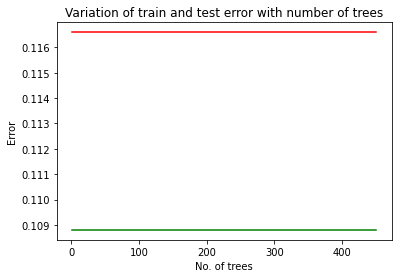

In [55]:
import matplotlib.pyplot as plt
plt.plot(x_axis, y_train_err, color = 'g', label='train')
plt.plot(x_axis, y_test_err, color = 'r', label='test')

plt.xlabel("No. of trees")
plt.ylabel("Error")
plt.title("Variation of train and test error with number of trees")
plt.show()

In [82]:
train = adaboost.stump_train_acc
test = adaboost.stump_test_acc

In [102]:
train_stump = [1-np.sum(train[i]) for i in range(len(train))]
test_stump = [1-np.sum(test[i]) for i in range(len(test))]
x_axis = [i for i in range(len(train_stump))]

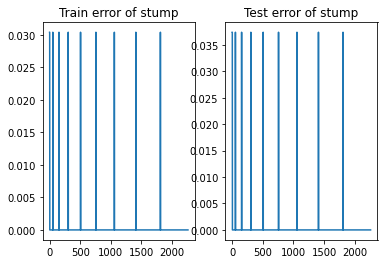

In [118]:
figure, axis = plt.subplots(1,2)
axis[0].plot(x_axis, train_stump)
axis[0].set_title("Train error of stump")
axis[1].plot(x_axis, test_stump)
axis[1].set_title("Test error of stump")

plt.show()